# Quantum Teleportation 

Quantum Teleportation is the process by which an arbitrary quantum state can be transferred from one location to another by using two other entangled qubits. Using the concepts of entanglement and Bell measurement we can teleport a quantum state from person A (Alice) to person B (Bob), and the quantum state with Alice is destroyed in the process following the no-cloning theorem.<br>
<br>
Using this protocol we intend to teleport the state $\vert\psi\rangle = \sqrt{0.50} \vert0\rangle + \sqrt{0.50} \vert1\rangle$ from Alice's qubit to Bob's qubit and verify our results at the end by plotting the probabilistic histogram.

### Installing and importing Qiskit to work with OpenQASM

In [ ]:
# Run the below command to install Qiskit if you are running this program for the first time
!pip install qiskit

In [1]:
from qiskit import *
from math import sqrt
from qiskit.visualization import plot_histogram
%matplotlib inline

### Intializing the quantum circuit

We begin by initialising three qubits ($\vert0\rangle$ by default) and three classical bits for measuring the three qubits.

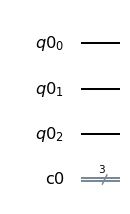

In [2]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)
circuit.draw(output='mpl')

Now we initialise the the first qubit ($\text{q0}_{0}$) as the state which we want to teleport. This state is with Alice currently.<br>
<br>
$$\vert\psi\rangle = \sqrt{0.50} \vert0\rangle + \sqrt{0.50} \vert1\rangle$$

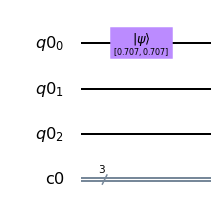

In [3]:
initial_state = [sqrt(0.50),sqrt(0.50)]
circuit.initialize(initial_state, qr[0])
circuit.draw(output='mpl')

### Quantum Circuit for Teleportation

Now we entangle the second and third qubit. After entangling them, the second qubit is given to Alice and the third qubit is given to Bob. Thereafter we perform Bell measurement of the first and the second qubits. Then we apply two controlled gates on Bob's qubit - a $Z$ gate if the measurement outcome of Alice's first qubit is 1 and a $X$ gate if the measurement outcome of Alice's second qubit is 1. The final state of the qubit with Bob will be $\vert\psi\rangle$! 

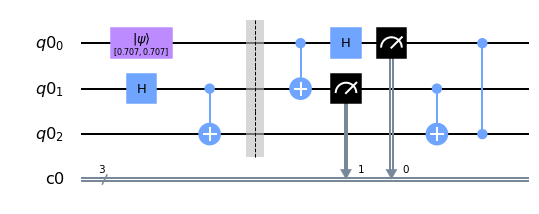

In [4]:
circuit.h(qr[1])
circuit.cx(qr[1], qr[2])
circuit.barrier()
circuit.cx(qr[0], qr[1])
circuit.h(qr[0])
circuit.measure([qr[0], qr[1]],[cr[0],cr[1]])
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

### Measuring the obtained results

Finally to check our results, we measure Bob's quantum state and perform this measurement 100000 times and plot a histogram which will give us the probability of measuring a $0$ or $1$ when Bob's quantum state collapses.

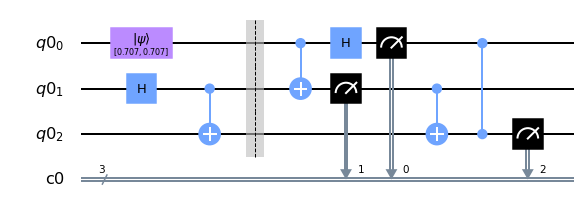

In [5]:
circuit.measure([qr[2]],[cr[2]])
circuit.draw(output='mpl')

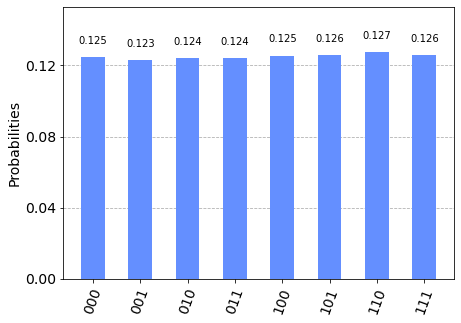

In [6]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=100000).result()
plot_histogram(result.get_counts(circuit))

From our normalised quantum state $\vert\psi\rangle = \sqrt{0.50} \vert0\rangle + \sqrt{0.50} \vert1\rangle$,<br>
Probability of measuring $0$ = $\vert\sqrt{0.50}\vert ^2 = 0.5$ <br>
Probability of measuring $1$ = $\vert\sqrt{0.50}\vert ^2 = 0.5$ <br>
<br>
From the obtained histogram, <br>
Probability of measuring $0$ after Bob's state collapses = $ 0.125+0.123+0.124+0.124 = 0.496$ <br>
Probability of measuring $1$ after Bob's state collapses = $ 0.125+0.126+0.127+0.126 = 0.504$ <br>
<br>
**Note** - The individual probabilities might vary little bit with every execution of the program, but the two final probabilities of measuring $0$ or $1$ at the end will be very close to 0.5 which confirms the success of Quantum Teleportation. <br>
<br>
Therefore, our state $\vert\psi\rangle$ has been teleported from Alice 's qubit to Bob's qubit!